# Avaliação 5
## FSC5705 - Física Computacional

### Equações diferenciais ordinárias

Apenas escreva o seu código na região marcada por:

```
# YOUR CODE HERE
raise NotImplementedError()
```

**Não esqueça de reiniciar o kernel e rodar todas as células para testar o notebook antes de enviar.**

### Questão 1

Considere o circuito RC abaixo.

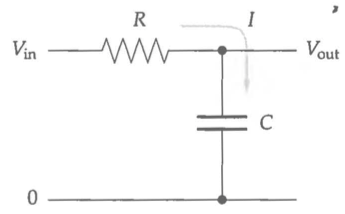

Este circuito funciona como um filtro, dada uma tensão de entrada $V_\text{in}(t)$, o circuito fornece uma tensão de saída $V_\text{out}(t)$. Vamos analisar este circuito e tentar determinar $V_\text{out}$ dada uma entrada $V_\text{in}$. Considere que a carga colocada em $V_\text{out}$ é de alta impedância, e a corrente que sai do circuito é desprezível. Isto é, a corrente que passa pelo resistor é a mesma que pelo capacitor.

Usando a lei das malhas,

$$
IR = V_\text{in} - V_\text{out}.
$$

Por outro lado, no capacitor,

$$
I = \frac{\mathrm{d}Q}{\mathrm{d}t},\qquad Q = C V_\text{out}.
$$

Juntando estas equações, é fácil mostrar que

$$
 \frac{\mathrm{d}V_\text{out}}{\mathrm{d}t} = \frac{1}{RC} \left(V_\text{in} - V_\text{out} \right).
$$

**a. (1 ponto)** Para resolver esta equação, precisamos saber primeiro a tensão de entrada, $V_\text{in}(t)$. Vamos supor que temos uma onda retangular de frequência $\nu$, em $[\mathrm{Hz}]$, e amplitude $1\,\mathrm{V}$. Uma forma de descrever esta função matematicamente é

\begin{align}
V_\text{in}(t) = \left\{ \
\begin{array}{ll}
1\,\mathrm{V} \qquad &\text{se} \lfloor 2\nu t \rfloor \text{é par}, \\
-1\,\mathrm{V} \qquad &\text{se} \lfloor 2\nu t \rfloor \text{é ímpar},
\end{array}
\right .
\end{align}

onde $\lfloor x \rfloor$ é significa "$x$ arredondado para o inteiro imediatamente abaixo". Em python, podemos usar a função `np.floor()`. Crie uma função chamada `Vin(t, nu)` que implemente esta função, e faça o seu gráfico para uma frequência de $2\,\mathrm{Hz}$, com $t$ variando de $0$ até $10\,\mathrm{s}$. *Dica: você pode usar o operador % para determinar se um número é par ou ímpar. Verifique a sua resposta contando os "dentes", deve haver 20 entre 0 e 10.*

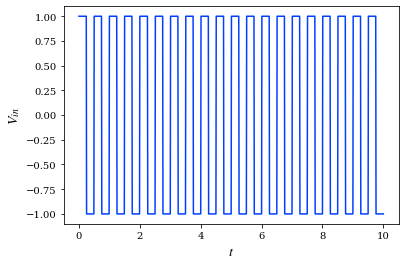

In [6]:
# Importando bibliotecas
# Inicialização
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 14 
    
def Vin(t, nu):
    v = 0
    if np.floor(2 * nu * t) % 2 == 0:
        v = 1
    else:
        v = -1
    return v 

# Dados do exercicio
nu = 2 # Hz
V_in = []
t = 0 
t1 = 0
t2 = 10
N = 1000
delta = (t2 - t1) / N
temp = []

for i in range (N + 1):
    temp.append(t)
    V_in.append(Vin(t,nu))
    t+=delta

# Grafico 
fig, ax = plt.subplots()
ax.plot(temp, V_in)
ax.set_xlabel('$t$')
ax.set_ylabel('$V_{in}$')
plt.show()

**b. (2 pontos)** Vamos admitir que o capacitor tem capacitância $C = 47\,\mathrm{nF}$, e o resistor tem resistência $R = 4.7\,\mathrm{k \Omega}$. Usando $V_\text{in}(t)$ definido no item anterior, com uma frequência $\nu = 200\,\mathrm{Hz}$, calcule a solução do circuito, isto é, $V_\text{out}(t)$, com a condição inicial $V_\text{out}(t=0) = 0$, no intervalo de $0 \leq t \leq 1\,\mathrm{s}$. Use o método de Runge–Kutta de quarta ordem (RK4), e escreva o programa explicitamente. Faça o gráfico da solução, mostrando os 2 últimos períodos.

*Dica 1: você precisa escolher um valor próprio para $h$. Como a solução deve ser periódica, com frequência próxima da entrada, use alguma fração do período, como $h = \frac{1}{40\nu}$.*

*Dica 2: para escolher a faixa de $t$ no gráfico, use algo como `ax.set_xlim(tf - 2/nu, tf)`, com `tf` sendo o limite superior de $t$, e `nu` sendo a frequência.*

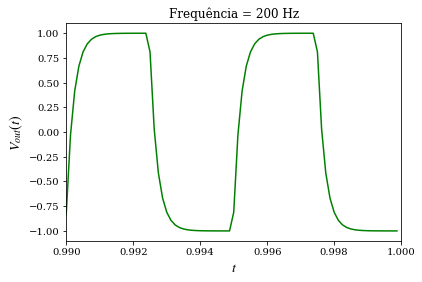

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def Vin(t, nu):
    v = 0
    if np.floor(2 * nu * t) % 2 == 0:
        v = 1
    else:
        v = -1
    return v 

def f(x, t):
    return (Vin(t, nu) - x) / (R*C)

# Dados do enunciado:
C = 47e-9 # F
R = 4.7e3 # Ohm
nu = 200 # Hz
t0 = 0
tf = 1
h = 1 / (40 * nu)

tempo = np.arange(t0, tf, h)
Vout = []
x = 0.

for t in tempo:
    Vout.append(x)
    k1 = h * f(x, t)
    k2 = h * f(x+0.5*k1, t+0.5*h)
    k3 = h * f(x+0.5*k2, t+0.5*h)
    k4 = h * f(x+k3, t+h)
    x += (k1 + 2*k2 + 2*k3 + k4) / 6

# Grafico
fig, ax = plt.subplots()
ax.plot(tempo, Vout, 'g-', label='$f$ = 200 Hz')
ax.set_xlabel('$t$')
ax.set_ylabel('$V_{out}(t)$')
ax.set_xlim(tf - 2/nu, tf)
plt.title('Frequência = 200 Hz')
plt.show()


**c. (2 pontos)** Faça uma simulação variando $\nu$, com os valores $200$, $800$ e $2000\,\mathrm{Hz}$. Faça um gráfico com todas as 3 soluções no mesmos eixos (isto é, somente 1 subplot, com as cuvas sobrepostas), mostrando a faixa de tempo de $0.99$ até $1\,\mathrm{s}$.

Este é um circuito RC agindo como um filtro. Pesquise sobre filtros RC e certifique-se de que a sua simulação está funcionando corretamente analisando, por exemplo, a forma e a amplitude da solução em função da frequência de entrada.

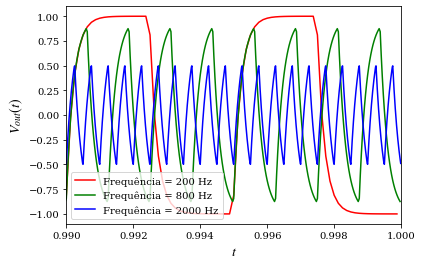

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Frequências:
nu_s = [200, 800, 2000] # Hz

Vout_s = []
Tempos = []

for i in nu_s:
    nu = i
    t0 = 0
    tf = 1
    h = 1 / (40 * nu)
    C = 47e-9 # Faraday
    R = 4.7e3 # Ohm

    tempo = np.arange(t0,tf,h)
    Vout = []
    x = 0.0
    
    for t in tempo:
        Vout.append(x)
        k1 = h * f(x, t)
        k2 = h * f(x+k1/2, t+h/2)
        k3 = h * f(x+k2/2, t+h/2)
        k4 = h * f(x+k3, t+h)
        x += (k1 + 2*k2 + 2*k3 + k4) / 6
    
    Vout_s.append(Vout)
    Tempos.append(tempo)
        
        
# Fazendo cada caso:
V_200 = Vout_s[0]
V_800 = Vout_s[1]
V_2000 = Vout_s[2]
# Tempos:
t_200 = Tempos[0]
t_800 = Tempos[1]
t_2000 = Tempos[2]

# Grafico
fig, ax = plt.subplots()
ax.plot(t_200, V_200, 'r-', label=f'Frequência = 200 Hz')
ax.plot(t_800, V_800, 'g-', label=f'Frequência = 800 Hz')
ax.plot(t_2000, V_2000, 'b-', label=f'Frequência = 2000 Hz')
ax.set_xlabel('$t$')
ax.set_ylabel('$V_{out}(t)$')
ax.set_xlim(0.99, 1.0)
ax.legend()
plt.show()

### Questão 2

As equações de Lotka–Volterra são um modelo matemático de interações predador–presa entre espécies. Sejam duas variáveis $x$ e $y$ proporcionais às populações de de duas espécies, $x$ são capivaras (presas) e $y$ são as onças pintadas (predadores). Vamos supor que as populações são grandes o suficiente para que possamos considerá-las como números reis, e tratar o problema com funções contínuas (pense o que pode significar uma [população de $10^{-18}$ onças](http://arima.inria.fr/020/pdf/vol.20.pp.95-125.pdf)).

No modelo de Lotka–Volterra as capivaras se reproduzem numa taxa proporcional à sua população, mas são comidas pelas onças numa taxa proporcional tanto à sua população quando à população das onças. Ou seja,

$$
\frac{\mathrm{d}x}{\mathrm{d}t} = \alpha x - \beta x y,
$$

onde $\alpha$ e $\beta$ são constantes. Ao mesmo tempo, as onças se reproduzem numa taxa proporcional à que comem as capivaras (pois precisam de comida para crescer e reproduzir), e morrem de velhice numa taxa proporcional à sua população, tal que

$$
\frac{\mathrm{d}y}{\mathrm{d}t} = \gamma x y - \delta y,
$$

com $\gamma$ e $\delta$ também constantes.

**a. (3 pontos)** Escreva um programa para resolver estas equações usando o método RK4, para o caso de $\alpha=1$, $\beta = 0.5$, $\gamma = 0.5$ e $\delta = 2$, com a condição inicial de $x = y = 2$. Faça um gráfico da solução mostrando as duas populações nos mesmo axes, indo de $t=0$ até $t=30$.

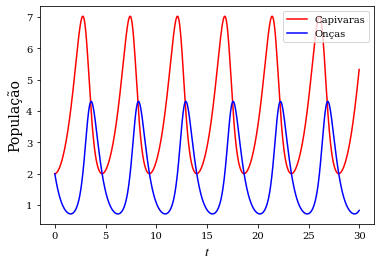

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Dados do enunciado:
alpha = 1
beta = 0.5
gamma = 0.5
delta = 2

def lotk(r, t):
    x = r[0]
    y = r[1]
    f_x = (alpha * x) - (beta * y * x)
    f_y = (gamma * x * y) - (delta * y)
    
    return np.array([f_x, f_y])

t0 = 0
tf = 30
N = 1000
h = (tf - t0) / N

tempo = np.arange(t0, tf, h)

V_x = [] ## Capivaras
V_y = [] ## Onças

r = np.array([2,2], dtype=float) 

for j in tempo:
    V_x.append(r[0])
    V_y.append(r[1]) 

    k1 = h * lotk(r, t)
    k2 = h * lotk(r+k1/2, t+h/2)
    k3 = h * lotk(r+k2/2, t+h/2)
    k4 = h * lotk(r+k3, t+h)
    
    r += (k1 + 2*k2 + 2*k3 + k4)/6

# Grafico
fig, ax = plt.subplots()
ax.plot(tempo, V_x, 'r', label=f'Capivaras')
ax.plot(tempo, V_y, 'b', label=f'Onças')
ax.set_xlabel('$t$')
ax.set_ylabel('População')
ax.legend()
plt.show()

**b. (2 pontos)** Veja que a solução é periódica, e as curvas têm uma diferença de fase. Podemos tentar ver como a solução se comporta no espaço de fase.

Use a função `scipy.integrate.solve_ivp` para encontrar as soluções do problema acima, para condições iniciais $x = y = p_0$, com $p_0 = 1, 1.5, 2, 2.5$ e $3$. Faça o gráfico do espaço de fase de todas as soluções nos mesmos axes ([exemplo](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations#/media/File:Lotka-Volterra_orbits_01.svg)).

*Dica: É possível mostrar que as trajetórias no espaço de fase são fechadas, porém isso pode não ocorrer quando aplicamos o método RK4. Experimente outros métodos usando o argumento `method` da função `solve_ivp`. Sugestão: `method='Radau'`.*

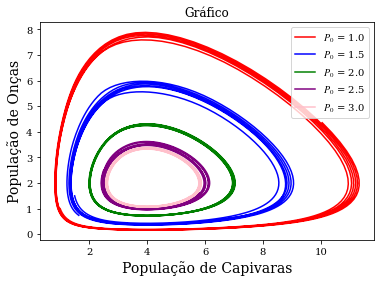

In [5]:
from scipy.integrate import solve_ivp
def ff(t, x):
    return lotk(x, t)


sol = solve_ivp(ff, t_span=[t0, tf], t_eval=tempo, y0=[1, 1])
sol2 = solve_ivp(ff, t_span=[t0, tf], t_eval=tempo, y0=[1.5, 1.5])
sol3 = solve_ivp(ff, t_span=[t0, tf], t_eval=tempo, y0=[2.0, 2.0])
sol4 = solve_ivp(ff, t_span=[t0, tf], t_eval=tempo, y0=[2.5, 2.5])
sol5 = solve_ivp(ff, t_span=[t0, tf], t_eval=tempo, y0=[3.0, 3.0])

fig, ax = plt.subplots()
ax.plot(sol.y[0],sol.y[1], 'r', label=f'$P_{0}$ = 1.0')
ax.plot(sol2.y[0],sol2.y[1], 'b', label=f'$P_{0}$ = 1.5')
ax.plot(sol3.y[0],sol3.y[1], 'green', label=f'$P_{0}$ = 2.0')
ax.plot(sol4.y[0],sol4.y[1], 'purple', label=f'$P_{0}$ = 2.5')
ax.plot(sol5.y[0],sol5.y[1], 'pink', label=f'$P_{0}$ = 3.0')
plt.title('Gráfico')
ax.set_xlabel('População de Capivaras')
ax.set_ylabel('População de Onças')
ax.legend()
plt.show()